In [65]:
import pandas as pd
import numpy as np
from functools import reduce
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN

In [34]:
#DB, USER ID, FOLLOWERS COUNT, 

In [35]:
whole = pd.read_csv('complete_allbrands_users_captions_list.csv', encoding="latin-1")
whole = whole[whole['followers_count']>10000]
whole = whole[whole['followers_count']<100000]

data = whole

In [36]:
# This is not going to run
user = pd.read_csv('30users.csv')
k = list(user.jenniferyoungstudio)
k.append('jenniferyoungstudio')
k = pd.DataFrame(k, columns= ['username'])
k['joined'] = 1
result = pd.merge(k, data, on='username', how='outer')

"""for i,v in enumerate(k.username):
    print(data[data.username==str(v)])"""
    #### Note to Karan: 
    ### we need to pick our users. They don't match
data = result[result.joined==1]
data = data.dropna(axis=0, how='any')
data = (data.drop_duplicates(subset=['username'], keep='first')).reset_index()


In [37]:
data

,index,username,joined,Unnamed: 0,followers_count,caption
0,0,vanessaballi,1.0,1879.0,19051.0,['Happy Halloween from Han Solo and Princess L...
1,1,lem0n,1.0,698.0,50654.0,['A recent favourite: Chanel Gabrielle - th??n...
2,2,kolorowekredki,1.0,664.0,52403.0,['Bold lips ?? @katarzyna_szafranska \n#bestmu...
3,6,siguemiestilo,1.0,1217.0,61488.0,"['Mi Málaga. Best place in the world ?', 'Cuan..."
4,8,jaclynrjohnson,1.0,800.0,53592.0,['Taking in the Cali sunshine before heading e...
5,9,mlle_michele,1.0,334.0,83842.0,['expose yourself to your deepest fear; after ...
6,10,carole_tolila,1.0,78.0,25364.0,['1ère piñata pour Thelma. Une future @elsa.gr...
7,12,thirlby,1.0,491.0,25121.0,['BEAUTY BITES: DIGESTIVE PICKLED VEGGIES | On...
8,15,gisellelam_theswanker,1.0,642.0,15436.0,['Oral care experience has never been such pro...
9,16,fooderati,1.0,442.0,11147.0,['Loss. Grief. Destruction. Recreation. \nThis...


In [38]:
whole = (whole.sample(n=50)).reset_index()

In [39]:
dftest = pd.concat([whole,data])

In [40]:
dftest = dftest.reset_index()

## dataframe created at end of doc

In [41]:
# Milano

userlist=[]
emojis = []
usernameforeachpost  = []
f2post = []
f3post = []

captionsfromsample = dftest
#captionsfromsample.drop(['level_0', 'index', 'Unnamed: 0'], axis =1, inplace = True)

listof = []
for num, singlepost in enumerate(captionsfromsample.caption): 
    ## f1 separates by user. This is each user's total supply of posts
    f1 = singlepost.split("\', \'")

    # take only the first quarter of their text
    total= (len(f1)/4)
    f1 = f1[0:int(total)]

    f3 = []

    #for i in (range(len(f1))):
    #    userlist.append(dftest.username)"""
    
    for j,k in enumerate(f1):

        userlist.append(dftest.username[num])
        
        f2 = (f1[j].replace("\n", " ")).replace("\\", "")
        
        #get emojis
        emoji = re.findall(r'[^\w\s,]', f2)
        emojis.append(emoji)
        
        f2post.append(f2)
        f3post.append(f3)
        f3.append(f2)
        #usernameforeachpost.append(dftest.username[num])

        
print(len(f2), len(f2post), len(f3post), len(emojis), len(userlist))


17 3719 3719 3719 3719


In [42]:
df1991 = pd.DataFrame({'caption': f2post, 'username': userlist, 'emojis': emojis}) 

In [43]:

df1991.to_csv('clean_data.csv', sep=',')

This is working!

In [44]:
df1991['polarity'] = np.zeros(len(df1991.caption))

vectorizer = CountVectorizer(stop_words=['and', 'or', 'before', 'a', 'an', 'the']) #min_df=4
df1991['vector'] = vectorizer
corpus = df1991['caption'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = df1991['polarity'].values

## it outputs words
## each line, token column
DF = pd.concat([pd.DataFrame(x), df1991.username], axis=1)


In [45]:
DF_username = DF.groupby('username').sum(axis=0)

In [46]:
x = DF_username

In [47]:
print("0")

0


# Kmeans - euclidean

In [48]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,10):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    
    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})

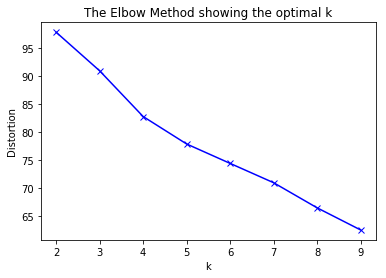

In [49]:
plt.plot(range(2,10), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [50]:
######################

DFclusters.to_csv('DFclusters_eucl.csv', sep=',')
######################
######################

In [51]:
print(x.shape)
y =np.vstack((x,order_centroids))
print(y.shape)


(73, 19137)
(82, 19137)


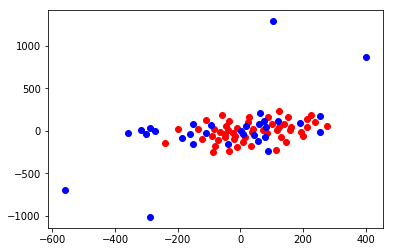

In [52]:


from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(y)
X_embedded.shape

plt.scatter(X_embedded[0:51,0],X_embedded[0:51,1] , color="r")
plt.scatter(X_embedded[51:,0],X_embedded[51:,1] , color="b")

In [53]:
list(DFclusters.listofwordspercluster[19:20])

[['in',
  'to',
  'for',
  'rn',
  'of',
  'you',
  'my',
  'by',
  'rrn',
  'with',
  'this',
  'de',
  'on',
  'is',
  'new',
  'it',
  'love',
  'at',
  'me',
  'so',
  'style',
  'und',
  'from',
  'all',
  'our',
  'we',
  'that',
  'fashion',
  'la',
  'summer',
  'your',
  'que',
  'one',
  'are',
  'ich',
  'erikapenadesigns',
  'up',
  'en',
  'happy',
  'look',
  'erikapena',
  'was',
  'makeup',
  'day',
  'be',
  'designer',
  'amazing',
  'like',
  'have',
  'out',
  'es',
  'travel',
  'dress',
  'as',
  'instagood',
  'can',
  'night',
  'do',
  'cute',
  'el',
  'followme',
  'link',
  'beauty',
  'die',
  'not',
  'com',
  'now',
  'more',
  'mothersfinestme',
  'thank',
  'ng',
  'bali',
  'beautiful',
  'mothersfinestblog',
  'what',
  'but',
  'today',
  'mamablog',
  'just',
  'make',
  'weekend',
  'last',
  'no',
  'time',
  'fun',
  'week',
  'da',
  'bio',
  'girl',
  'gorgeous',
  'un',
  'when',
  'morning',
  'denim',
  'nnew',
  'con',
  'laviepinkette',
  

# Kmean - hamming

In [100]:
x = DF_username

In [102]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(7,7):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'hamming'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    
    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters_hamming = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})

In [103]:
order_centroids.shape

(9, 19137)

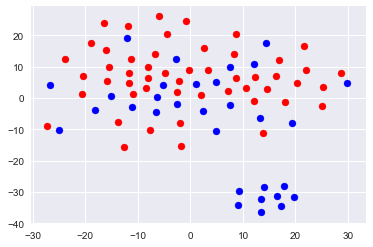

In [104]:

from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(y)
X_embedded.shape

plt.scatter(X_embedded[0:51,0],X_embedded[0:51,1] , color="r")
plt.scatter(X_embedded[51:,0],X_embedded[51:,1] , color="b")

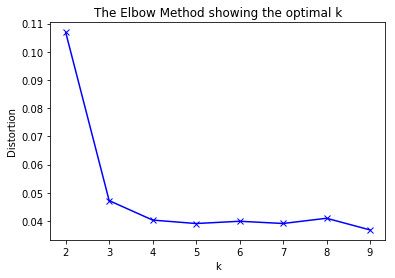

In [58]:
plt.plot(range(2,10), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [59]:
DFclusters_hamming.to_csv('DFclusters_hamming.csv', sep=',')

In [99]:
list(DFclusters_hamming.listofwordspercluster[26:27])

[['to',
  'my',
  'it',
  'of',
  'in',
  'for',
  'you',
  'this',
  'is',
  'with',
  'so',
  'that',
  'on',
  'me',
  'like',
  'your',
  'was',
  'just',
  'but',
  'all',
  'are',
  'have',
  'love',
  'can',
  'today',
  'we',
  'out',
  'from',
  'how',
  'what',
  'by',
  'at',
  'be',
  'get',
  'day',
  'do',
  'about',
  'new',
  'link',
  'pic',
  'up',
  've',
  'one',
  'her',
  'see',
  'more',
  'beauty',
  'if',
  'hair',
  'when',
  'some',
  'life',
  'guys',
  'because',
  'way',
  'there',
  'into',
  'now',
  'liketoknow',
  'super',
  'beautiful',
  'got',
  'who',
  'had',
  'will',
  'profile',
  'braids',
  'our',
  'want',
  'think',
  'much',
  'feel',
  'would',
  'off',
  'really',
  'dutch',
  'time',
  'she',
  'been',
  'blonde',
  'excited',
  'too',
  'http',
  'still',
  'week',
  'as',
  'am',
  'training',
  'blog',
  'details',
  'something',
  'ad',
  'liketk',
  'good',
  'best',
  'being',
  'not',
  'happy',
  'braid',
  'fall',
  'look',
  '

# LDA 

In [60]:
tf = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()
#vectorizer

In [61]:
"""
from gensim import corpora, models
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)
lda = LdaModel(corpus, num_topics=100)  # train model
print(lda[doc_bow]) # get topic probability distribution for a document"""

'\nfrom gensim import corpora, models\n#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)\nlda = LdaModel(corpus, num_topics=100)  # train model\nprint(lda[doc_bow]) # get topic probability distribution for a document'

In [62]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 10

# #Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [63]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, terms, no_top_words)

Topic 0:
rn erikapenadesigns erikapena designer for beauty travel bali new makeup
Topic 1:
ranrandesign makeupartist macrame wallart interiordesign hospitality glowmakeup interiortrends kolorowekredki lipstick
Topic 2:
ng th nh mình ch like4like likeforlike likers có ko
Topic 3:
to in you of my for it is with on
Topic 4:
30 halloween ava_adorertw na igkhair avaadore do 19 em lifeisamazing
Topic 5:
raphaellemestre in calledelsale46 mestre raphaelleboutique fw1718 direct nuoviarrivi online da
Topic 6:
denim tnp bandofoutsiders bandofoutsiders_ anissakermiche feature aw17 mohair guillermofridman vestidodefesta
Topic 7:
nhair nstyling actor nphotography stellar nmake reflection model dancer gemmakeil
Topic 8:
und ich in rrn mothersfinestme mothersfinestblog mamablog die es blogger_at
Topic 9:
de cachefashionshop que rrn en cachecache cachecache2 style shoponline la


In [68]:
tf = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()
#vectorizer

from sklearn.mixture import GMM
gmm = GMM(n_components=6).fit((tf).toarray())
labels = gmm.predict(corpus)
plt.scatter(corpus[:, 0], corpus[:, 1], c=labels, s=40, cmap='viridis');

/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecatio

ValueError: could not convert string to float: 'self - reflection'

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(gmm, terms, no_top_words)